In [97]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [98]:
# load dataset as csv
df=pd.read_csv("combined_df.csv")
df

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Cargo Volumn,Alloy Wheel Size_2,City,Gear Box_1,Rear Brake Type_1,Front Brake Type_1,Acceleration_1,Top Speed_1,Drive Type_1,Turning Radius_1
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,235-litres,NaN,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,352-litres,16,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,242-litres,14,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,407-litres,14,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,353-litres,16,Bangalore,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,...,313,NaN,Kolkata,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8365,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,...,177-litres,NaN,Kolkata,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8366,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,...,475-litres,NaN,Kolkata,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8367,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,...,236-liters,NaN,Kolkata,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
# simply seeing columns for any duplicate columns arrived
df.columns

Index(['it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem',
       'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText.imgUrl',
       'trendingText.heading', 'trendingText.desc', 'Registration Year',
       'Insurance Validity', 'Fuel Type', 'Seats', 'Kms Driven', 'RTO',
       'Ownership', 'Engine Displacement', 'Transmission',
       'Year of Manufacture', 'Mileage', 'Engine', 'Max Power', 'Torque',
       'Seats_1', 'Wheel Size', 'Color', 'Engine Type', 'Displacement',
       'Max Power_1', 'Max Torque', 'No of Cylinder', 'Values per Cylinder',
       'Value Configuration', 'Fuel Suppy System', 'BoreX Stroke',
       'Compression Ratio', 'Turbo Charger', 'Super Charger',
       'Seating Capacity', 'Steering Type', 'Tyre Type', 'Alloy Wheel Size',
       'No Door Numbers', 'Length', 'Width', 'Height', 'Wheel Base',
       'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gross Weight',
      

In [100]:
# dropping duplicates columns and also unwanted columns for predicting price and only taking important coolumns 18 columns
df.drop(columns=[ 'km','owner',
        'centralVariantId', 'variantName',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText.imgUrl',
       'trendingText.heading', 'trendingText.desc', 'Registration Year',
        'Fuel Type', 'Seats', 'RTO',
       'Ownership', 'Engine Displacement', 'Transmission',
       'Year of Manufacture', 'Max Power', 'Torque',
        'Wheel Size', 'Engine Type', 'Displacement',
       'Max Power_1', 'Max Torque', 'No of Cylinder', 'Values per Cylinder',
       'Value Configuration', 'Fuel Suppy System', 'BoreX Stroke',
       'Compression Ratio', 'Turbo Charger', 'Super Charger',
       'Seating Capacity', 'Steering Type', 'Tyre Type', 'Alloy Wheel Size',
       'No Door Numbers', 'Length', 'Width', 'Height', 'Wheel Base',
       'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gross Weight',
       'Ground Clearance Unladen', 'Seating Capacity_1', 'Steering Type_1',
       'Tyre Type_1', 'Alloy Wheel Size_1', 'No Door Numbers_1',
       'Seating Capacity_2', 'Steering Type_2', 'Turning Radius',
       'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration',
       'Tyre Type_2', 'No Door Numbers_2', 'Cargo Volumn',
       'Alloy Wheel Size_2', 'Gear Box_1', 'Rear Brake Type_1',
       'Front Brake Type_1', 'Acceleration_1', 'Top Speed_1', 'Drive Type_1',
       'Turning Radius_1'],inplace=True,axis=1)

In [101]:
# printing dataframe after dropping
df

,it,ft,bt,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats_1,Color,Gear Box,Drive Type,City
0,0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,₹ 4 Lakh,Third Party insurance,"1,20,000 Kms",23.1 kmpl,998 CC,5.0,White,5 Speed,FWD,Bangalore
1,0,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,₹ 8.11 Lakh,Comprehensive,"32,706 Kms",17 kmpl,1497 CC,5.0,White,5 Speed,FWD,Bangalore
2,0,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,₹ 5.85 Lakh,Comprehensive,"11,949 Kms",23.84 kmpl,1199 CC,5.0,Red,5 Speed,FWD,Bangalore
3,0,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,₹ 4.62 Lakh,Comprehensive,"17,794 Kms",19.1 kmpl,1197 CC,5.0,Others,5 Speed,FWD,Bangalore
4,0,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,₹ 7.90 Lakh,Third Party insurance,"60,000 Kms",23.65 kmpl,1248 CC,5.0,Gray,5 Speed,FWD,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,₹ 5.10 Lakh,Third Party insurance,"10,000 Kms",25.24 kmpl,998 CC,5.0,Others,5-Speed,NaN,Kolkata
8365,0,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,₹ 1.80 Lakh,Third Party insurance,"1,20,000 Kms",22.74 kmpl,796 CC,5.0,Others,5 Speed,FWD,Kolkata
8366,0,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,₹ 5.50 Lakh,Third Party insurance,"50,000 Kms",11.74 kmpl,1796 CC,5.0,Others,7 Speed,RWD,Kolkata
8367,0,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,₹ 1.40 Lakh,Third Party insurance,"40,000 Kms",18.5 kmpl,1197 CC,5.0,Others,5 Speed,FWD,Kolkata


In [102]:
# count missing values 
df.isnull().sum()
# missing values are minimum and maximum . minimum: ,2,4,4,2,4,3,6 and mximum:287,2680,3714

it                       0
ft                       0
bt                       4
transmission             0
ownerNo                  0
oem                      0
model                    0
modelYear                0
price                    0
Insurance Validity       4
Kms Driven               2
Mileage                287
Engine                   4
Seats_1                  6
Color                    3
Gear Box              2680
Drive Type            3714
City                     0
dtype: int64

# Handling missing values 

In [103]:
# here dropping missing values columns and also unimportant column 
df.drop(columns=["it","Gear Box","Drive Type",],inplace=True,axis=1)

In [104]:
# count of missing values
df.isnull().sum()

ft                      0
bt                      4
transmission            0
ownerNo                 0
oem                     0
model                   0
modelYear               0
price                   0
Insurance Validity      4
Kms Driven              2
Mileage               287
Engine                  4
Seats_1                 6
Color                   3
City                    0
dtype: int64

In [105]:
# body type(bt) having min missing values and for selling that car bt is also important because body type is shows how cars look like sports car etc so not dropping bt
# first see unique values for bt
df["bt"].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans',
       'Pickup Trucks', 'Convertibles', 'Hybrids', nan, 'Wagon'],
      dtype=object)

In [106]:
df.head()

,ft,bt,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats_1,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,₹ 4 Lakh,Third Party insurance,"1,20,000 Kms",23.1 kmpl,998 CC,5.0,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,₹ 8.11 Lakh,Comprehensive,"32,706 Kms",17 kmpl,1497 CC,5.0,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,₹ 5.85 Lakh,Comprehensive,"11,949 Kms",23.84 kmpl,1199 CC,5.0,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,₹ 4.62 Lakh,Comprehensive,"17,794 Kms",19.1 kmpl,1197 CC,5.0,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,₹ 7.90 Lakh,Third Party insurance,"60,000 Kms",23.65 kmpl,1248 CC,5.0,Gray,Bangalore


In [107]:
# Seeing NAN values in bt column
df[pd.isna(df["bt"])]

,ft,bt,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats_1,Color,City
3382,Petrol,NaN,Automatic,1,Toyota,Toyota Vellfire,2023,₹ 1.19 Crore,Comprehensive,"10,500 Kms",NaN,2487 CC,7.0,White,Delhi
5390,Petrol,NaN,Manual,1,Maruti,Maruti Eeco,2019,₹ 4.95 Lakh,Comprehensive,"13,500 Kms",19.71 kmpl,1197 CC,5.0,Silver,Hyderabad
5411,Petrol,NaN,Manual,1,Maruti,Maruti Eeco,2020,₹ 5.20 Lakh,Comprehensive,"16,415 Kms",19.71 kmpl,1197 CC,5.0,Grey,Hyderabad
8114,Petrol,NaN,Manual,1,Maruti,Maruti Eeco,2019,₹ 3.95 Lakh,Comprehensive,"21,166 Kms",19.71 kmpl,1197 CC,5.0,Blue,Kolkata


In [108]:
#In model column Toyato vellfire row in bt column replace fill minivans 
# replace NaN values with model name
df.loc[df['model']=="Toyota Vellfire","bt"]= "Minivans"
df.loc[df['model']=="Maruti Eeco","bt"]="Minivans"

In [109]:
df.isnull().sum()

ft                      0
bt                      0
transmission            0
ownerNo                 0
oem                     0
model                   0
modelYear               0
price                   0
Insurance Validity      4
Kms Driven              2
Mileage               287
Engine                  4
Seats_1                 6
Color                   3
City                    0
dtype: int64

In [110]:
df[pd.isna(df["Insurance Validity"])]

,ft,bt,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats_1,Color,City
105,Petrol,Hatchback,Automatic,1,Honda,Honda Jazz,2018,₹ 7.55 Lakh,NaN,"64,374 Kms",19 kmpl,1199 CC,5.0,Grey,Bangalore
120,Diesel,Sedan,Automatic,1,Skoda,Skoda Superb,2014,₹ 16.50 Lakh,NaN,"36,349 Kms",17.2 kmpl,1968 CC,5.0,White,Bangalore
122,Petrol,SUV,Manual,2,Renault,Renault Duster,2014,₹ 6.30 Lakh,NaN,"83,394 Kms",13.24 kmpl,1598 CC,5.0,Red,Bangalore
3023,Petrol,Hatchback,Automatic,1,Maruti,Maruti Ignis,2018,₹ 5.05 Lakh,NaN,"41,200 Kms",20.89 kmpl,1197 CC,5.0,White,Delhi


In [111]:
# Removing missing values column having rows because this not important for price predicting
df.dropna(subset = ["Insurance Validity","Kms Driven","Engine","Color"],inplace = True)

In [112]:
df

,ft,bt,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats_1,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,₹ 4 Lakh,Third Party insurance,"1,20,000 Kms",23.1 kmpl,998 CC,5.0,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,₹ 8.11 Lakh,Comprehensive,"32,706 Kms",17 kmpl,1497 CC,5.0,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,₹ 5.85 Lakh,Comprehensive,"11,949 Kms",23.84 kmpl,1199 CC,5.0,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,₹ 4.62 Lakh,Comprehensive,"17,794 Kms",19.1 kmpl,1197 CC,5.0,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,₹ 7.90 Lakh,Third Party insurance,"60,000 Kms",23.65 kmpl,1248 CC,5.0,Gray,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,₹ 5.10 Lakh,Third Party insurance,"10,000 Kms",25.24 kmpl,998 CC,5.0,Others,Kolkata
8365,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,₹ 1.80 Lakh,Third Party insurance,"1,20,000 Kms",22.74 kmpl,796 CC,5.0,Others,Kolkata
8366,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,₹ 5.50 Lakh,Third Party insurance,"50,000 Kms",11.74 kmpl,1796 CC,5.0,Others,Kolkata
8367,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,₹ 1.40 Lakh,Third Party insurance,"40,000 Kms",18.5 kmpl,1197 CC,5.0,Others,Kolkata


In [113]:
# count of missing values
df.isnull().sum()

ft                      0
bt                      0
transmission            0
ownerNo                 0
oem                     0
model                   0
modelYear               0
price                   0
Insurance Validity      0
Kms Driven              0
Mileage               284
Engine                  0
Seats_1                 6
Color                   0
City                    0
dtype: int64

In [114]:
df[pd.isna(df["Seats_1"])]

,ft,bt,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats_1,Color,City
1175,Petrol,Hatchback,Manual,3,Maruti,Maruti Estilo,2009,₹ 2 Lakh,Third Party insurance,"40,000 Kms",19.5 kmpl,1061 CC,NaN,Others,Bangalore
3528,Petrol,SUV,Manual,2,Nissan,Nissan Kicks,2019,₹ 7 Lakh,Third Party insurance,"60,000 Kms",NaN,1498 CC,NaN,Gray,Delhi
6211,Diesel,SUV,Manual,2,Ford,Ford Endeavour,2008,₹ 3.90 Lakh,Third Party insurance,"1,20,000 Kms",11.4 kmpl,2953 CC,NaN,Black,Jaipur
7608,Petrol,Hatchback,Manual,2,Maruti,Maruti Estilo,2010,₹ 1.20 Lakh,Third Party insurance,"70,000 Kms",19.5 kmpl,1061 CC,NaN,Others,Kolkata
7669,Petrol,Hatchback,Manual,2,Maruti,Maruti Estilo,2009,₹ 1.20 Lakh,Third Party insurance,"50,000 Kms",19.5 kmpl,1061 CC,NaN,Gold,Kolkata
7745,Diesel,Sedan,Manual,1,Hindustan Motors,Ambassador,2014,₹ 1.20 Lakh,Third Party insurance,"1,20,000 Kms",12.8 kmpl,1995 CC,NaN,Yellow,Kolkata


In [115]:
# replacing NaN values rows in seat_1 column with seats size in numbers mannualy
df.loc[df["model"]=="Maruti Estilo","Seats_1"]=5.0
df.loc[df["model"]=="Nissan Kicks","Seats_1"]=5.0
df.loc[df["model"]=="Ford Endeavour","Seats_1"]=7.0
df.loc[df["model"]=="Ambassador","Seats_1"]=5.0

In [116]:
df.isnull().sum()

ft                      0
bt                      0
transmission            0
ownerNo                 0
oem                     0
model                   0
modelYear               0
price                   0
Insurance Validity      0
Kms Driven              0
Mileage               284
Engine                  0
Seats_1                 0
Color                   0
City                    0
dtype: int64

In [117]:
df.head()

,ft,bt,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats_1,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,₹ 4 Lakh,Third Party insurance,"1,20,000 Kms",23.1 kmpl,998 CC,5.0,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,₹ 8.11 Lakh,Comprehensive,"32,706 Kms",17 kmpl,1497 CC,5.0,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,₹ 5.85 Lakh,Comprehensive,"11,949 Kms",23.84 kmpl,1199 CC,5.0,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,₹ 4.62 Lakh,Comprehensive,"17,794 Kms",19.1 kmpl,1197 CC,5.0,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,₹ 7.90 Lakh,Third Party insurance,"60,000 Kms",23.65 kmpl,1248 CC,5.0,Gray,Bangalore


In [118]:
df.shape

(8359, 15)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8359 entries, 0 to 8368
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ft                  8359 non-null   object 
 1   bt                  8359 non-null   object 
 2   transmission        8359 non-null   object 
 3   ownerNo             8359 non-null   int64  
 4   oem                 8359 non-null   object 
 5   model               8359 non-null   object 
 6   modelYear           8359 non-null   int64  
 7   price               8359 non-null   object 
 8   Insurance Validity  8359 non-null   object 
 9   Kms Driven          8359 non-null   object 
 10  Mileage             8075 non-null   object 
 11  Engine              8359 non-null   object 
 12  Seats_1             8359 non-null   float64
 13  Color               8359 non-null   object 
 14  City                8359 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.0+ MB


In [120]:
# removing symbols and extra spaces and changing datatype
df["Kms Driven"]=df["Kms Driven"].str.replace("Kms","").str.replace(",","").str.strip().astype(int)
df["Mileage"]=df["Mileage"].str.replace("kmpl","").str.replace("km/kg","").str.strip().astype(float)
df["Engine"]=df["Engine"].str.replace("CC","").str.strip()
df["Seats_1"]=df["Seats_1"].astype(int)
df["price"]=df["price"].str.extract(r'(\d+\.?\d*)').astype(float)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8359 entries, 0 to 8368
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ft                  8359 non-null   object 
 1   bt                  8359 non-null   object 
 2   transmission        8359 non-null   object 
 3   ownerNo             8359 non-null   int64  
 4   oem                 8359 non-null   object 
 5   model               8359 non-null   object 
 6   modelYear           8359 non-null   int64  
 7   price               8359 non-null   float64
 8   Insurance Validity  8359 non-null   object 
 9   Kms Driven          8359 non-null   int64  
 10  Mileage             8075 non-null   float64
 11  Engine              8359 non-null   object 
 12  Seats_1             8359 non-null   int64  
 13  Color               8359 non-null   object 
 14  City                8359 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 1.0+ MB


In [122]:
df.isnull().sum()

ft                      0
bt                      0
transmission            0
ownerNo                 0
oem                     0
model                   0
modelYear               0
price                   0
Insurance Validity      0
Kms Driven              0
Mileage               284
Engine                  0
Seats_1                 0
Color                   0
City                    0
dtype: int64

In [123]:
# removeing Engine column because engine not important for predictor 
df.drop(columns=["Engine"],inplace=True)
# after removing this columns rows look like unorgnaized index so we want orderize index rows
df.reset_index(drop=True,inplace =True)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8359 entries, 0 to 8358
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ft                  8359 non-null   object 
 1   bt                  8359 non-null   object 
 2   transmission        8359 non-null   object 
 3   ownerNo             8359 non-null   int64  
 4   oem                 8359 non-null   object 
 5   model               8359 non-null   object 
 6   modelYear           8359 non-null   int64  
 7   price               8359 non-null   float64
 8   Insurance Validity  8359 non-null   object 
 9   Kms Driven          8359 non-null   int64  
 10  Mileage             8075 non-null   float64
 11  Seats_1             8359 non-null   int64  
 12  Color               8359 non-null   object 
 13  City                8359 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 914.4+ KB


In [125]:
# filling NaN rowsin mileage column by taking mean of mileage column values
df["Mileage"]=df["Mileage"].fillna(df["Mileage"].mean())

In [126]:
df.isnull().sum()

ft                    0
bt                    0
transmission          0
ownerNo               0
oem                   0
model                 0
modelYear             0
price                 0
Insurance Validity    0
Kms Driven            0
Mileage               0
Seats_1               0
Color                 0
City                  0
dtype: int64

In [127]:
# Replace columns name
df = df.rename(columns={"ft":"Fuel type","bt":"body type","Seats_1":"Seats","oem":"Brand"})

In [128]:
df

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5,Gray,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,5.10,Third Party insurance,10000,25.24,5,Others,Kolkata
8355,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,1.80,Third Party insurance,120000,22.74,5,Others,Kolkata
8356,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,5.50,Third Party insurance,50000,11.74,5,Others,Kolkata
8357,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,1.40,Third Party insurance,40000,18.50,5,Others,Kolkata


In [129]:
# statistical view of the numerical data
df.describe()

,ownerNo,modelYear,price,Kms Driven,Mileage,Seats
count,8359.000000,8359.000000,8359.000000,8.359000e+03,8359.000000,8359.000000
mean,1.359732,2016.511664,10.020416,5.899696e+04,19.245568,5.203254
std,0.641480,3.904774,12.627646,7.408873e+04,3.836193,0.663339
min,0.000000,1985.000000,1.000000,1.010000e+02,7.080000,2.000000
25%,1.000000,2014.000000,4.000000,3.000000e+04,17.010000,5.000000
50%,1.000000,2017.000000,6.190000,5.370100e+04,19.020000,5.000000
75%,2.000000,2019.000000,9.750000,8.000000e+04,21.400000,5.000000
max,5.000000,2023.000000,99.000000,5.500000e+06,140.000000,10.000000


In [130]:
# statistical view of categorical data
df.describe(include="object")

,Fuel type,body type,transmission,Brand,model,Insurance Validity,Color,City
count,8359,8359,8359,8359,8359,8359,8359,8359
unique,5,10,2,33,315,7,152,6
top,Petrol,Hatchback,Manual,Maruti,Honda City,Third Party insurance,Others,Delhi
freq,5547,3563,6046,2248,370,4051,2168,1484


# Data viaualization

In [131]:
# seeing uniques
df["Fuel type"].unique()

array(['Petrol', 'Diesel', 'Lpg', 'Cng', 'Electric'], dtype=object)

In [132]:
# seeing how many uniques 
df["Fuel type"].value_counts()

Fuel type
Petrol      5547
Diesel      2671
Cng           98
Electric      27
Lpg           16
Name: count, dtype: int64

<Axes: title={'center': 'count of Fuel type'}, xlabel='Fuel type', ylabel='count'>

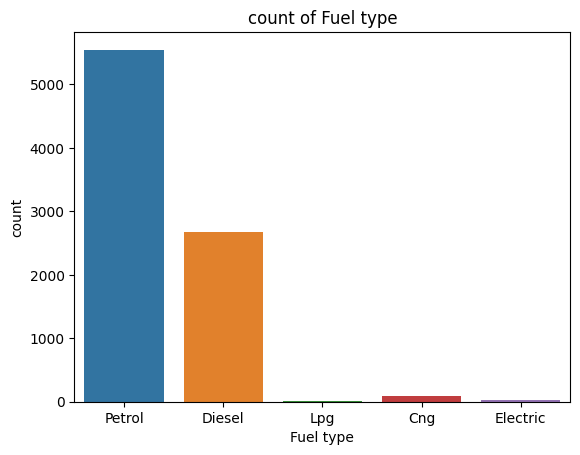

In [133]:
# visualizing countplot of fuel type
plt.title("count of Fuel type")
sns.countplot(x=df["Fuel type"],data=df,hue="Fuel type")

In [134]:
## # seeing uniques in bodytype columns
df["body type"].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans',
       'Pickup Trucks', 'Convertibles', 'Hybrids', 'Wagon'], dtype=object)

In [135]:
# seeing how many uniques in bodytype columns
df["body type"].value_counts()

body type
Hatchback        3563
SUV              2222
Sedan            2171
MUV               352
Minivans           27
Coupe              10
Pickup Trucks       6
Convertibles        6
Hybrids             1
Wagon               1
Name: count, dtype: int64

<Axes: title={'center': 'count of body type'}, xlabel='body type', ylabel='count'>

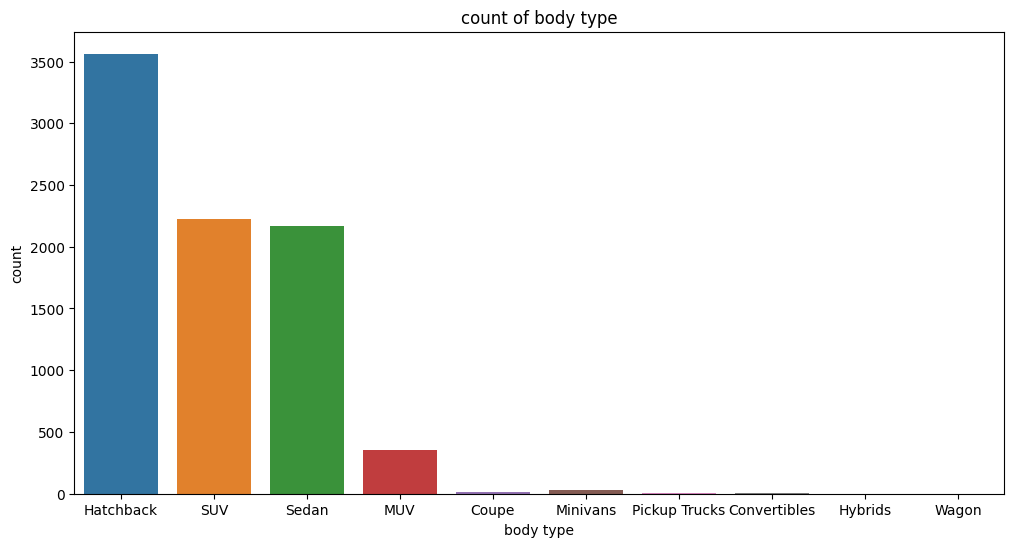

In [136]:
plt.figure(figsize=(12,6))
plt.title("count of body type")
sns.countplot(x=df["body type"],data=df,hue="body type")

In [137]:
# seeing uniques in transmission columns
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [138]:
# seeing how many uniques in transmission columns
df["transmission"].value_counts()

transmission
Manual       6046
Automatic    2313
Name: count, dtype: int64

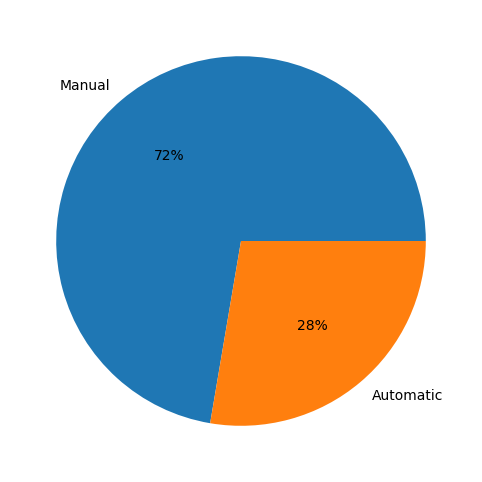

In [139]:
# visualizing pie chart of transmission column
plt.figure(figsize=(12,6))
plt.pie(df["transmission"].value_counts(),autopct="%1.0f%%",labels=["Manual","Automatic"])
plt.show()

In [140]:
#=seeing unique in Brand column
df["Brand"].unique()

array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Nissan',
       'Fiat', 'Mahindra Ssangyong', 'Mitsubishi', 'Jaguar', 'Land Rover',
       'Chevrolet', 'Citroen', 'Opel', 'Mahindra Renault', 'Isuzu',
       'Lexus', 'Porsche', 'Hindustan Motors'], dtype=object)

In [141]:
# counting unique values in Brand column
df["Brand"].value_counts()

Brand
Maruti                2248
Hyundai               1651
Honda                  864
Tata                   430
Mahindra               376
Toyota                 325
Ford                   311
Renault                311
Volkswagen             294
Mercedes-Benz          244
BMW                    184
Skoda                  160
Kia                    158
Audi                   156
Jeep                   112
MG                      90
Nissan                  78
Chevrolet               76
Datsun                  74
Land Rover              44
Volvo                   41
Jaguar                  35
Fiat                    31
Mitsubishi              14
Mini                    12
Citroen                  8
Porsche                  6
Lexus                    5
Mahindra Renault         5
Isuzu                    5
Mahindra Ssangyong       4
Hindustan Motors         4
Opel                     3
Name: count, dtype: int64

# Checking columns for unique values

In [142]:
df["modelYear"].unique()

array([2015, 2018, 2014, 2020, 2017, 2021, 2019, 2022, 2016, 2011, 2009,
       2013, 2010, 2008, 2006, 2012, 2005, 2007, 2023, 1998, 2004, 2003,
       2001, 2002, 2000, 1985, 1997, 1999])

In [143]:
df["Insurance Validity"].unique()

array(['Third Party insurance', 'Comprehensive', 'Third Party',
       'Zero Dep', '2', '1', 'Not Available'], dtype=object)

In [144]:
df["Color"].unique()

array(['White', 'Red', 'Others', 'Gray', 'Grey', 'Maroon', 'Orange',
       'Silver', 'Blue', 'Brown', 'Yellow', 'Black', 'Golden', 'Green',
       'O Purple', 'Other', 'Gold', 'TITANIUM GREY', 'Violet',
       'MODERN STEEL METALLIC', 'PLATINUM WHITE', 'Golden Brown',
       'Aurora Black Pearl', 'Beige', 'Star Dust', 'Flash Red', 'Purple',
       'PLATINUM WHITE PEARL', 'Wine Red', 'Taffeta White',
       'Minimal Grey', 'Fiery Red', 'T Wine', 'Prime Star Gaze',
       'TAFETA WHITE', 'P Black', 'Golden brown', 'METALL',
       'MET ECRU BEIGE', 'COPPER', 'TITANIUM', 'CHILL', 'Burgundy',
       'Lunar Silver Metallic', 'SILKY SILVER', 'BERRY RED',
       'PREMIUM AMBER METALLIC', 'R EARTH', 'PLATINUM SILVER',
       'ORCHID WHITE PEARL', 'CARNELIAN RED PEARL', 'POLAR WHITE',
       'BEIGE', 'Medium Blue', 'Alabaster Silver Metallic',
       'Carbon Steel', 'Cavern Grey', 'ESPRESO_BRWN', 'Pearl White',
       'Polar White', 'Magma Grey', 'Dark Red', 'Falsa Colour', 'Cherry',
       'H

In [145]:
df

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5,Gray,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,5.10,Third Party insurance,10000,25.24,5,Others,Kolkata
8355,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,1.80,Third Party insurance,120000,22.74,5,Others,Kolkata
8356,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,5.50,Third Party insurance,50000,11.74,5,Others,Kolkata
8357,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,1.40,Third Party insurance,40000,18.50,5,Others,Kolkata


In [146]:
# checking duplicates in rowise
duplicates = df.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
8354    False
8355    False
8356    False
8357    False
8358    False
Length: 8359, dtype: bool

In [147]:
# giving duplicated rows in df
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
79,Petrol,Hatchback,Manual,2,Maruti,Maruti Ritz,2014,4.20,Third Party insurance,60000,18.500000,5,Silver,Bangalore
113,Petrol,SUV,Automatic,1,Hyundai,Hyundai Venue,2019,12.50,Third Party insurance,20000,18.150000,5,Others,Bangalore
121,Petrol,Hatchback,Manual,3,Hyundai,Hyundai i10,2009,2.49,Third Party insurance,80000,20.360000,5,Others,Bangalore
180,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.100000,5,White,Bangalore
194,Petrol,Sedan,Manual,1,Fiat,Fiat Linea,2009,3.75,Third Party insurance,50000,16.000000,5,Gray,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8202,Petrol,Sedan,Automatic,1,Volkswagen,Volkswagen Vento,2017,6.50,Comprehensive,54000,18.190000,5,Grey,Kolkata
8254,Petrol,SUV,Automatic,1,Hyundai,Hyundai Venue,2021,9.50,Comprehensive,29000,18.150000,5,White,Kolkata
8287,Petrol,MUV,Manual,1,Kia,Kia Carens,2022,10.99,Comprehensive,20000,19.245568,7,White,Kolkata
8329,Petrol,Hatchback,Manual,1,Maruti,Maruti Swift,2021,6.50,Third Party insurance,10000,21.210000,5,Others,Kolkata


In [148]:
df["body type"].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans',
       'Pickup Trucks', 'Convertibles', 'Hybrids', 'Wagon'], dtype=object)

In [149]:
print(f"Hatchback:{df[df["body type"]=="Hatchback"]["Seats"].unique()}")

Hatchback:[5 4 6]


# saving data cleaned file in folder

In [150]:
import os 
os.getcwd()

'c:\\Users\\Santhosh\\OneDrive\\Desktop\\python_class\\project3ML'

In [151]:
path=r"C:\Users\Santhosh\OneDrive\Desktop\python_class\project3ML\final_model.csv"
df.to_csv(path,index=False)# in csv format

# historgram visualization  for all data 

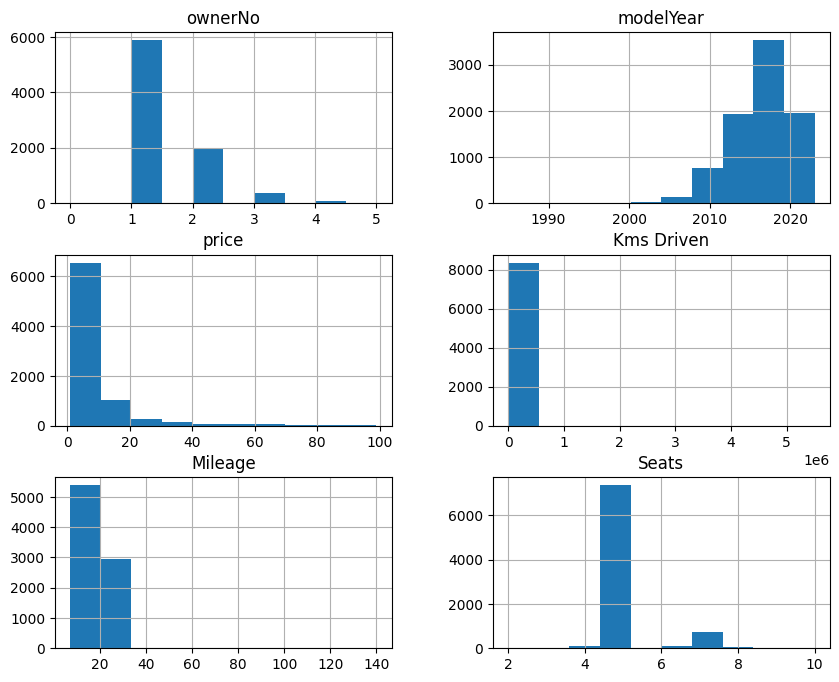

In [152]:
# plotting histogram for numerical values having columns alone
df.hist(figsize=(10,8))
plt.show()

# visualing

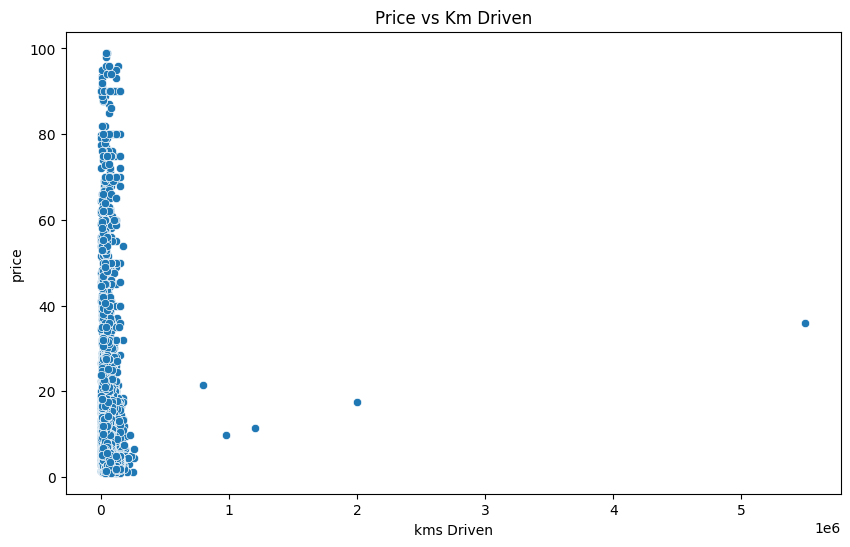

In [153]:
# scatterplot putting for price and column
plt.figure(figsize=(10,6))
plt.title("Price vs Km Driven")
sns.scatterplot(y="price",x="Kms Driven",data=df)
plt.xlabel("kms Driven")
plt.ylabel("price")
plt.show()

In [154]:
df.head()

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5,Gray,Bangalore


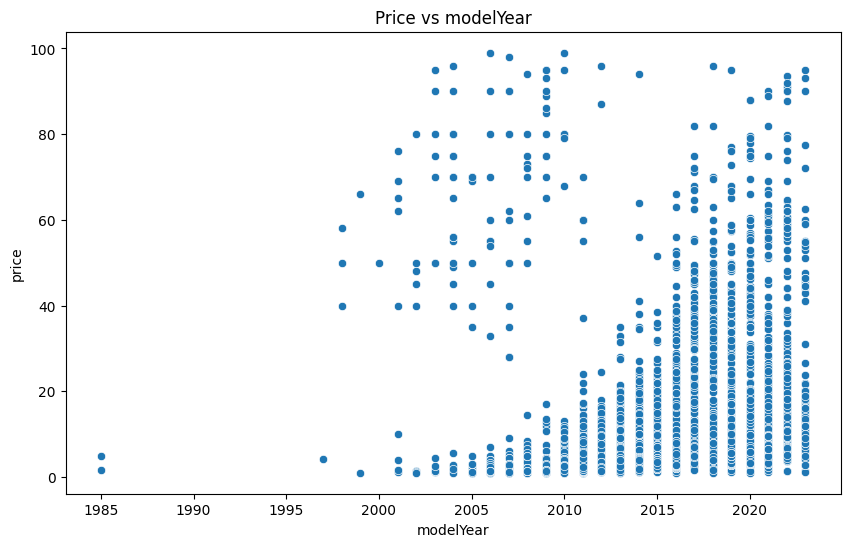

In [155]:
# scatterplot putting for price and modelYear
plt.figure(figsize=(10,6))
plt.title("Price vs modelYear")
sns.scatterplot(y="price",x="modelYear",data=df)
plt.xlabel("modelYear")
plt.ylabel("price")
plt.show()

<Axes: xlabel='transmission', ylabel='price'>

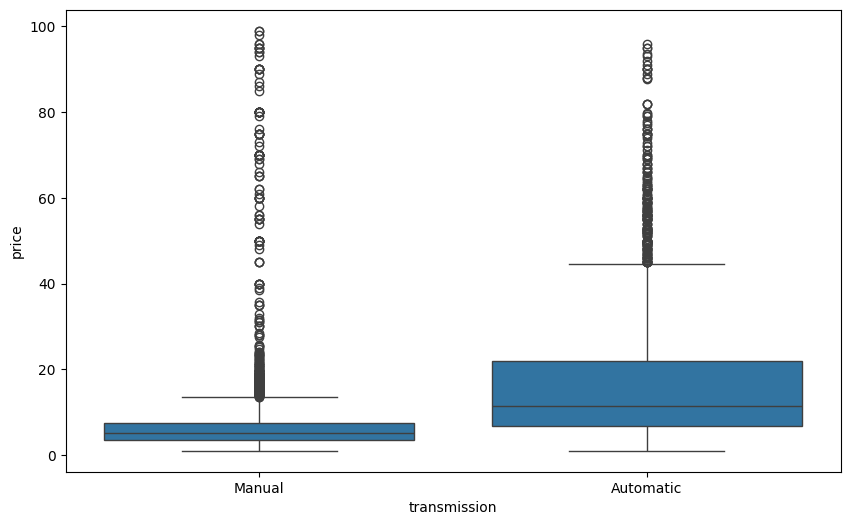

In [156]:
# boxplot putting for transmission and price 
# transmisson is categorical and price is numerical boxplot is best for categorical and numerical combined
plt.figure(figsize=(10,6))
sns.boxplot(x="transmission",y="price",data=df)

<Axes: xlabel='modelYear', ylabel='price'>

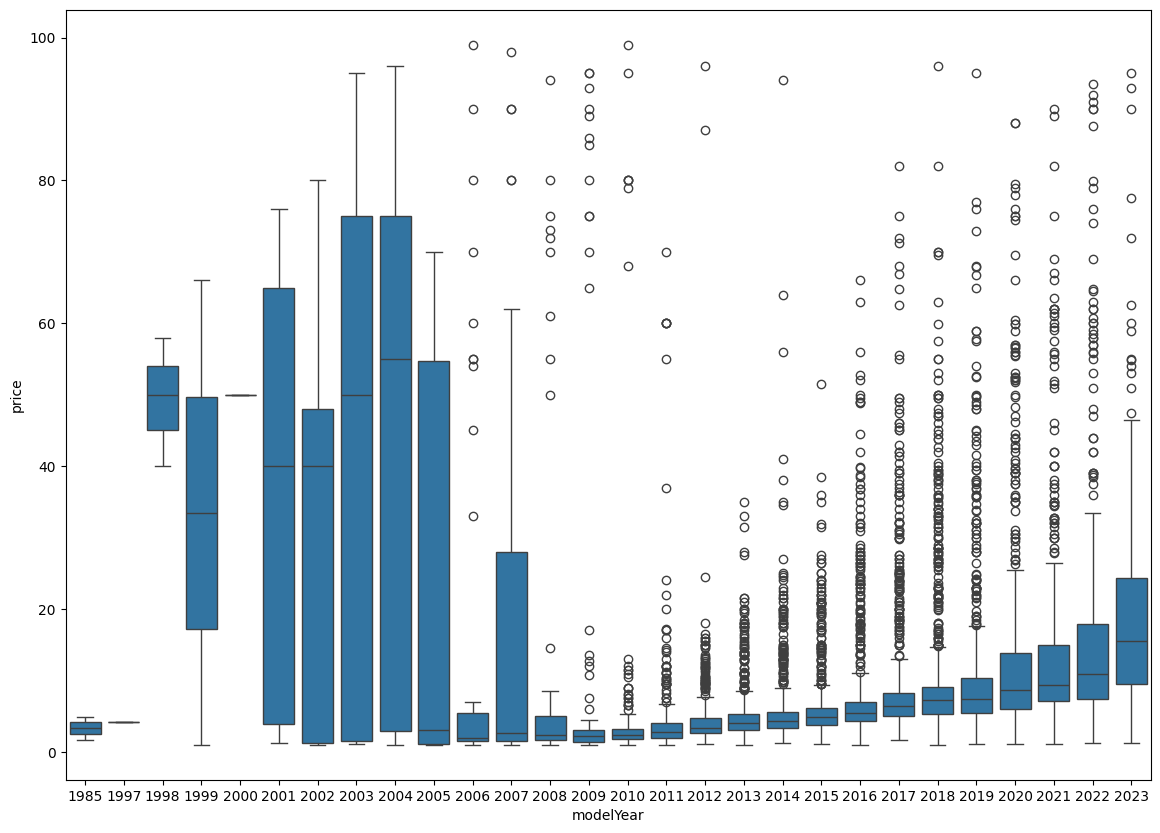

In [157]:
plt.figure(figsize=(14,10))
sns.boxplot(x="modelYear",y="price",data=df)

<Axes: xlabel='body type', ylabel='price'>

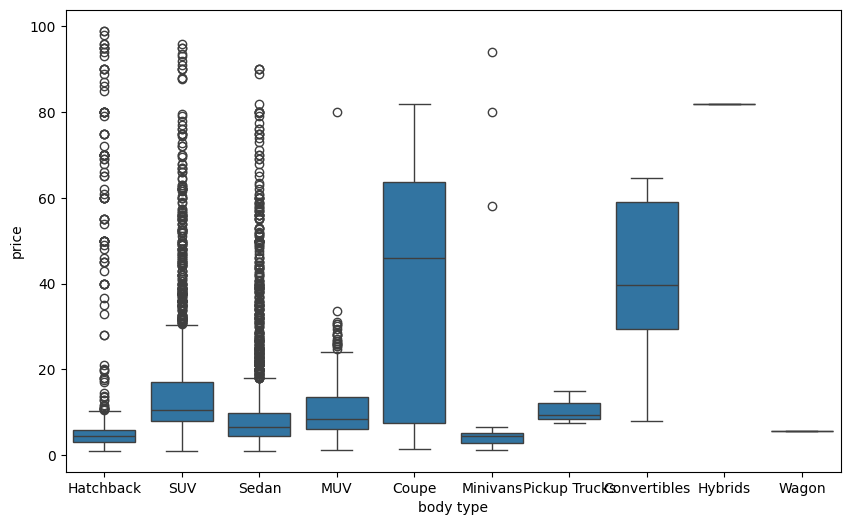

In [158]:
# boxplot putting for bodytype and  price 
plt.figure(figsize=(10,6))
sns.boxplot(x="body type",y="price",data =df)

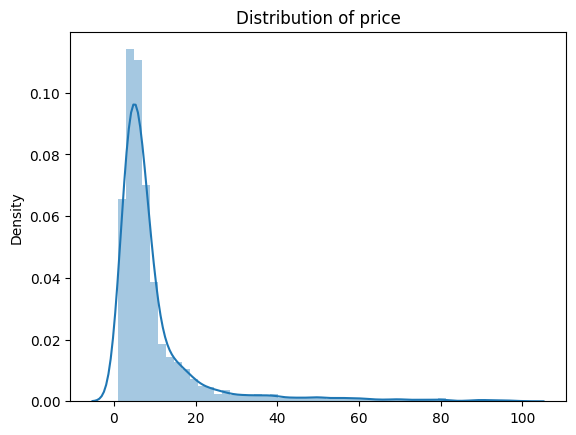

In [159]:
# distribution plot putting for price 

sns.distplot(x=df["price"],kde=True)
plt.title("Distribution of price")
plt.show()

In [160]:
import os 
os.getcwd()

'c:\\Users\\Santhosh\\OneDrive\\Desktop\\python_class\\project3ML'

In [161]:
path=r"c:\\Users\\Santhosh\\OneDrive\\Desktop\\python_class\\project3ML\final_df.csv"
df.to_csv(path,index=False)

# Outliers removing

In [162]:
# Outliers removing for price column by IQR method 

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3-Q1


In [163]:
# Finding upper fence and lower fence 
upper_fence = Q3+1.5 * IQR
lower_fence = Q1-1.5 * IQR

In [164]:
print("upper fence =",upper_fence)
print("lower_fence",lower_fence)

upper fence = 18.375
lower_fence -4.625


In [165]:
# Trimming
df_filtered = df[(df["price"]>=lower_fence)&(df["price"]<=upper_fence)]

In [166]:
# after trimmed  counting low outliers 
low_outliers = len(df[df["price"]<lower_fence])

In [167]:
## after trimmed  counting high outliers 
high_outliers = len(df[df["price"]>upper_fence])


In [168]:
print(f"Count of lower outliers: {low_outliers}")
print(f"Count of upper outliers: {high_outliers}")

Count of lower outliers: 0
Count of upper outliers: 919


<Axes: ylabel='price'>

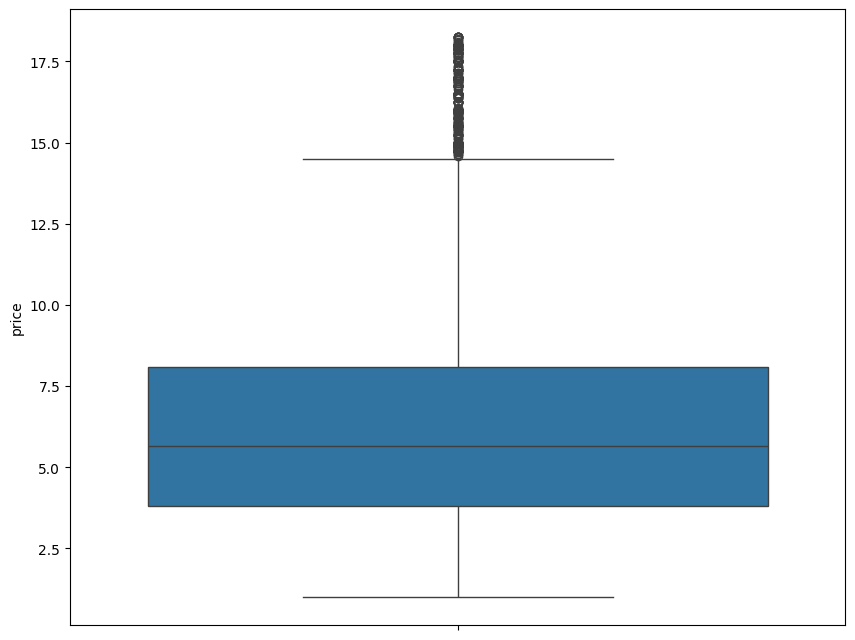

In [169]:
# after trimmed plotting box plot
plt.figure(figsize=(10,8))
sns.boxplot(df_filtered["price"])

In [170]:
# index reseting(ordering) because it is unordered due to removing some rows outilers
df_filtered.reset_index(inplace =True,drop=True)
df_filtered

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5,Gray,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,5.10,Third Party insurance,10000,25.24,5,Others,Kolkata
7436,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,1.80,Third Party insurance,120000,22.74,5,Others,Kolkata
7437,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,5.50,Third Party insurance,50000,11.74,5,Others,Kolkata
7438,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,1.40,Third Party insurance,40000,18.50,5,Others,Kolkata


In [171]:
df["Brand"].unique()

array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Nissan',
       'Fiat', 'Mahindra Ssangyong', 'Mitsubishi', 'Jaguar', 'Land Rover',
       'Chevrolet', 'Citroen', 'Opel', 'Mahindra Renault', 'Isuzu',
       'Lexus', 'Porsche', 'Hindustan Motors'], dtype=object)

In [172]:
df[df["Brand"]=="BMW"]["price"].max()

np.float64(93.5)

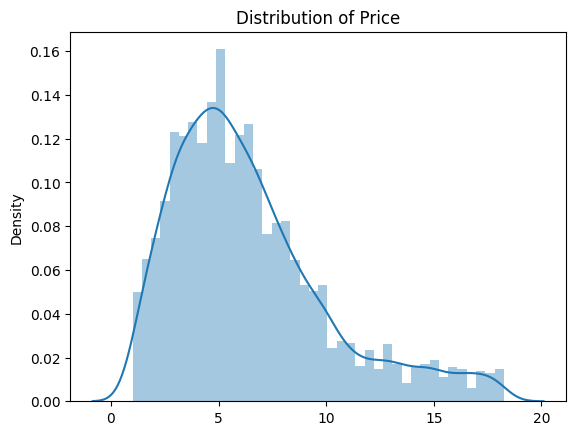

In [173]:
sns.distplot(x=df_filtered["price"],kde=True)
plt.title("Distribution of Price")
plt.show()

<Axes: xlabel='body type', ylabel='price'>

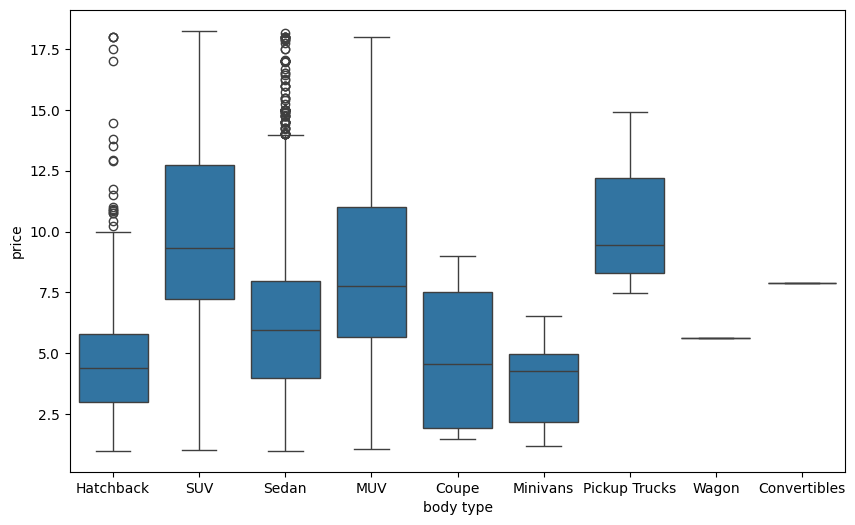

In [174]:
plt.figure(figsize=(10,6))
sns.boxplot(x="body type",y="price",data=df_filtered)

In [175]:
# taking maximum  in price index price column 
max_price_index = df_filtered["price"].idxmax()
max_price_index

112

In [176]:
# taking maximum in price  row all columns
max_price_row = df_filtered.loc[max_price_index]
display(max_price_row)

Fuel type                     Diesel
body type                        SUV
transmission               Automatic
ownerNo                            1
Brand                        Hyundai
model                 Hyundai Tucson
modelYear                       2017
price                          18.25
Insurance Validity     Comprehensive
Kms Driven                     57000
Mileage                        16.38
Seats                              5
Color                          White
City                       Bangalore
Name: 112, dtype: object

# Scaling

In [177]:
df.head()

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5,Gray,Bangalore


In [178]:
df_filtered.columns

Index(['Fuel type', 'body type', 'transmission', 'ownerNo', 'Brand', 'model',
       'modelYear', 'price', 'Insurance Validity', 'Kms Driven', 'Mileage',
       'Seats', 'Color', 'City'],
      dtype='object')

In [179]:

# creating a list to hold name of the numerical columns
num_col = df_filtered.drop(columns=["price"],axis=1).select_dtypes(include=['int', 'float']).columns.to_list()
num_col

['ownerNo', 'modelYear', 'Kms Driven', 'Mileage', 'Seats']

In [180]:
#scaling the data with standardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_filtered[num_col]=scaler.fit_transform(df_filtered[num_col])


In [181]:
df_filtered

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Petrol,Hatchback,Manual,2.541457,Maruti,Maruti Celerio,-0.375008,4.00,Third Party insurance,1.365298,0.933490,-0.283072,White,Bangalore
1,Petrol,SUV,Manual,0.985591,Ford,Ford Ecosport,0.427733,8.11,Comprehensive,-0.610685,-0.709898,-0.283072,White,Bangalore
2,Petrol,Hatchback,Manual,-0.570275,Tata,Tata Tiago,0.427733,5.85,Comprehensive,-1.080540,1.132851,-0.283072,Red,Bangalore
3,Petrol,Sedan,Manual,-0.570275,Hyundai,Hyundai Xcent,-0.642588,4.62,Comprehensive,-0.948232,-0.144141,-0.283072,Others,Bangalore
4,Diesel,SUV,Manual,-0.570275,Maruti,Maruti SX4 S Cross,-0.375008,7.90,Third Party insurance,0.007141,1.081664,-0.283072,Gray,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,Petrol,Hatchback,Manual,-0.570275,Maruti,Maruti Celerio,1.498054,5.10,Third Party insurance,-1.124657,1.510022,-0.283072,Others,Kolkata
7436,Petrol,Hatchback,Manual,-0.570275,Maruti,Maruti Alto 800,-0.642588,1.80,Third Party insurance,1.365298,0.836503,-0.283072,Others,Kolkata
7437,Petrol,Sedan,Automatic,2.541457,Mercedes-Benz,Mercedes-Benz C-Class,-1.445329,5.50,Third Party insurance,-0.219219,-2.126983,-0.283072,Others,Kolkata
7438,Petrol,Hatchback,Manual,-0.570275,Maruti,Maruti Ritz,-1.177749,1.40,Third Party insurance,-0.445578,-0.305786,-0.283072,Others,Kolkata


In [182]:
import pickle
with open('standard.pkl','wb') as f:
   pickle.dump(scaler,f)


In [183]:
catg_col=df_filtered.select_dtypes(include="object").columns.to_list()

In [184]:
catg_col

['Fuel type',
 'body type',
 'transmission',
 'Brand',
 'model',
 'Insurance Validity',
 'Color',
 'City']

In [185]:
df_filtered[catg_col]

,Fuel type,body type,transmission,Brand,model,Insurance Validity,Color,City
0,Petrol,Hatchback,Manual,Maruti,Maruti Celerio,Third Party insurance,White,Bangalore
1,Petrol,SUV,Manual,Ford,Ford Ecosport,Comprehensive,White,Bangalore
2,Petrol,Hatchback,Manual,Tata,Tata Tiago,Comprehensive,Red,Bangalore
3,Petrol,Sedan,Manual,Hyundai,Hyundai Xcent,Comprehensive,Others,Bangalore
4,Diesel,SUV,Manual,Maruti,Maruti SX4 S Cross,Third Party insurance,Gray,Bangalore
...,...,...,...,...,...,...,...,...
7435,Petrol,Hatchback,Manual,Maruti,Maruti Celerio,Third Party insurance,Others,Kolkata
7436,Petrol,Hatchback,Manual,Maruti,Maruti Alto 800,Third Party insurance,Others,Kolkata
7437,Petrol,Sedan,Automatic,Mercedes-Benz,Mercedes-Benz C-Class,Third Party insurance,Others,Kolkata
7438,Petrol,Hatchback,Manual,Maruti,Maruti Ritz,Third Party insurance,Others,Kolkata


# Encoding

In [186]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False,handle_unknown="ignore")
encoder.fit(df_filtered[catg_col])

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [187]:
encoder.categories_

[array(['Cng', 'Diesel', 'Electric', 'Lpg', 'Petrol'], dtype=object),
 array(['Convertibles', 'Coupe', 'Hatchback', 'MUV', 'Minivans',
        'Pickup Trucks', 'SUV', 'Sedan', 'Wagon'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object),
 array(['Audi', 'BMW', 'Chevrolet', 'Citroen', 'Datsun', 'Fiat', 'Ford',
        'Hindustan Motors', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep',
        'Kia', 'Land Rover', 'MG', 'Mahindra', 'Mahindra Renault',
        'Mahindra Ssangyong', 'Maruti', 'Mercedes-Benz', 'Mini',
        'Mitsubishi', 'Nissan', 'Porsche', 'Renault', 'Skoda', 'Tata',
        'Toyota', 'Volkswagen', 'Volvo'], dtype=object),
 array(['Ambassador', 'Audi A3', 'Audi A4', 'Audi A6', 'Audi Q3',
        'Audi Q5', 'Audi Q7', 'BMW 1 Series', 'BMW 3 Series',
        'BMW 3 Series GT', 'BMW 5 Series', 'BMW 6 Series', 'BMW 7 Series',
        'BMW X1', 'BMW X3', 'BMW X5', 'BMW X7', 'Chevrolet Aveo',
        'Chevrolet Beat', 'Chevrolet Captiva', 'Chevrolet Cruze',
        '

In [188]:

#list of new column
new_encoded_col= list(encoder.get_feature_names_out(catg_col))
new_encoded_col


['Fuel type_Cng',
 'Fuel type_Diesel',
 'Fuel type_Electric',
 'Fuel type_Lpg',
 'Fuel type_Petrol',
 'body type_Convertibles',
 'body type_Coupe',
 'body type_Hatchback',
 'body type_MUV',
 'body type_Minivans',
 'body type_Pickup Trucks',
 'body type_SUV',
 'body type_Sedan',
 'body type_Wagon',
 'transmission_Automatic',
 'transmission_Manual',
 'Brand_Audi',
 'Brand_BMW',
 'Brand_Chevrolet',
 'Brand_Citroen',
 'Brand_Datsun',
 'Brand_Fiat',
 'Brand_Ford',
 'Brand_Hindustan Motors',
 'Brand_Honda',
 'Brand_Hyundai',
 'Brand_Isuzu',
 'Brand_Jaguar',
 'Brand_Jeep',
 'Brand_Kia',
 'Brand_Land Rover',
 'Brand_MG',
 'Brand_Mahindra',
 'Brand_Mahindra Renault',
 'Brand_Mahindra Ssangyong',
 'Brand_Maruti',
 'Brand_Mercedes-Benz',
 'Brand_Mini',
 'Brand_Mitsubishi',
 'Brand_Nissan',
 'Brand_Porsche',
 'Brand_Renault',
 'Brand_Skoda',
 'Brand_Tata',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Brand_Volvo',
 'model_Ambassador',
 'model_Audi A3',
 'model_Audi A4',
 'model_Audi A6',
 'model_Audi Q

In [189]:
df_filtered[new_encoded_col]=encoder.transform(df_filtered[catg_col])
df_filtered.head()

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,...,Color_golden brown,Color_m grey,Color_magma gray,Color_urban titanim,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,Petrol,Hatchback,Manual,2.541457,Maruti,Maruti Celerio,-0.375008,4.00,Third Party insurance,1.365298,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Petrol,SUV,Manual,0.985591,Ford,Ford Ecosport,0.427733,8.11,Comprehensive,-0.610685,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Petrol,Hatchback,Manual,-0.570275,Tata,Tata Tiago,0.427733,5.85,Comprehensive,-1.080540,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Petrol,Sedan,Manual,-0.570275,Hyundai,Hyundai Xcent,-0.642588,4.62,Comprehensive,-0.948232,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Diesel,SUV,Manual,-0.570275,Maruti,Maruti SX4 S Cross,-0.375008,7.90,Third Party insurance,0.007141,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [190]:

# drop the unwanted columns
df_filtered.drop(columns=catg_col,inplace=True)
df_filtered

,ownerNo,modelYear,price,Kms Driven,Mileage,Seats,Fuel type_Cng,Fuel type_Diesel,Fuel type_Electric,Fuel type_Lpg,...,Color_golden brown,Color_m grey,Color_magma gray,Color_urban titanim,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,2.541457,-0.375008,4.00,1.365298,0.933490,-0.283072,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.985591,0.427733,8.11,-0.610685,-0.709898,-0.283072,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.570275,0.427733,5.85,-1.080540,1.132851,-0.283072,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.570275,-0.642588,4.62,-0.948232,-0.144141,-0.283072,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.570275,-0.375008,7.90,0.007141,1.081664,-0.283072,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,-0.570275,1.498054,5.10,-1.124657,1.510022,-0.283072,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7436,-0.570275,-0.642588,1.80,1.365298,0.836503,-0.283072,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7437,2.541457,-1.445329,5.50,-0.219219,-2.126983,-0.283072,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7438,-0.570275,-1.177749,1.40,-0.445578,-0.305786,-0.283072,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Save file

In [191]:
with open('encoder.pkl','wb') as file:
    pickle.dump(encoder,file)

In [192]:
path=r"C:\Users\Santhosh\OneDrive\Desktop\python_class\project3ML\std_enc.csv"
df_filtered.to_csv(path,index=False)# in csv format